In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df=pd.read_csv('lung.csv')

In [6]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [8]:
df.shape

(59, 7)

In [9]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [10]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [12]:
# drop two columns Name and Surname
df.drop(['Name', 'Surname'], axis=1, inplace=True)

In [13]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [14]:
df.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

# visualize the data

<Axes: xlabel='Age', ylabel='Smokes'>

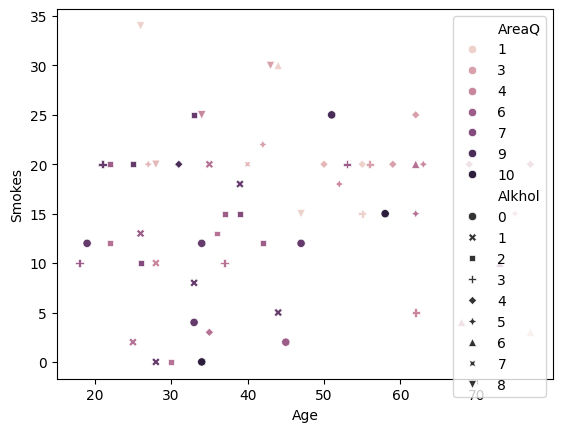

In [18]:
sns.scatterplot(df,x='Age',y='Smokes',hue='AreaQ',style='Alkhol')

<Axes: ylabel='count'>

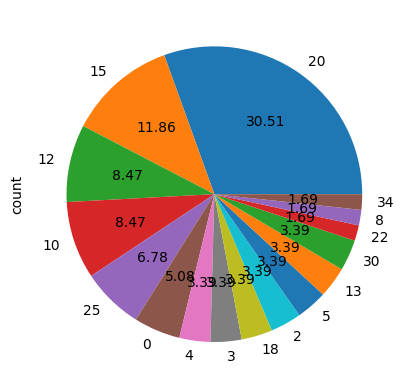

In [21]:
df['Smokes'].value_counts().plot(kind='pie',autopct='%.2f')

In [24]:
hist

array([0.07395994, 0.01760951, 0.01188642, 0.0070438 , 0.00572309,
       0.00396214, 0.00264143, 0.00220119, 0.00308166, 0.00176095])

# split the data

In [26]:
x=df.drop('Result',axis=1)

In [27]:
y=df['Result']

In [28]:
x.shape

(59, 4)

In [29]:
y.shape

(59,)

In [30]:
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


<Axes: ylabel='Age'>

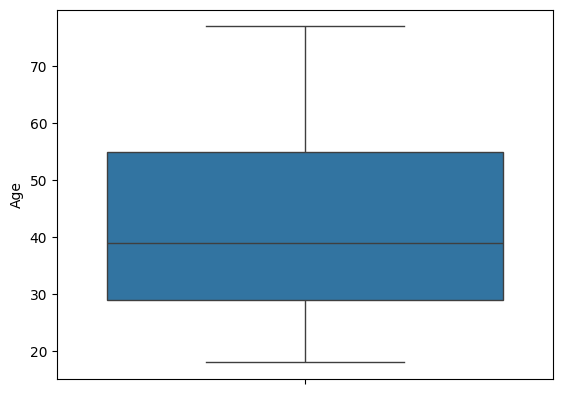

In [31]:
sns.boxplot(data=df,y='Age')

<Axes: ylabel='Smokes'>

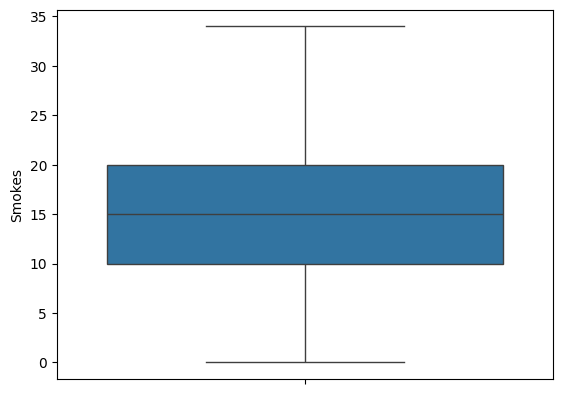

In [32]:
sns.boxplot(data=df,y='Smokes')

<Axes: ylabel='AreaQ'>

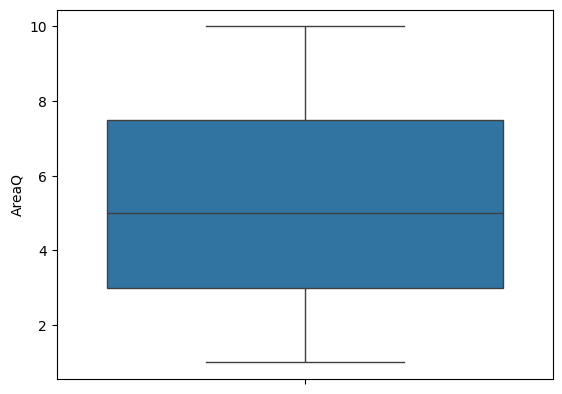

In [33]:
sns.boxplot(data=df,y='AreaQ')

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape

(47, 4)

In [37]:
y_train.shape

(47,)

In [42]:
# scale the value from x_trian and x_test
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
y_pred=model.predict(x_test_scaled)

In [48]:
# accuracy_score and confusion_matrix classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)



0.9166666666666666

In [49]:
confusion_matrix(y_test,y_pred)


array([[8, 0],
       [1, 3]])

In [50]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94         8\n           1       1.00      0.75      0.86         4\n\n    accuracy                           0.92        12\n   macro avg       0.94      0.88      0.90        12\nweighted avg       0.93      0.92      0.91        12\n'